In [ ]:
!wget -O hamshahri.rar "https://drive.google.com/u/0/uc?id=1D3yt99D0GcCRCbdKbUQGxbqjkeh91hTg&export=download&confirm=t&uuid=8cf8ef84-5033-4de3-97dc-588c35004d6c"

In [ ]:
!unrar x hamshahri.rar

In [ ]:
!unzip hamshahriold / Corpus / Hamshahri-All\ \(SQL\).zip
!unzip hamshahriold / Corpus / Hamshahri-Corpus.zip
!unzip hamshahriold / Corpus / PersianStopWords.zip

Archive:  hamshahriold/Corpus/Hamshahri-All (SQL).zip
   creating: Hamshahri-All (SQL)/
  inflating: Hamshahri-All (SQL)/Hamshahri-Term_Data.MDF  
  inflating: Hamshahri-All (SQL)/Hamshahri-Term_Log.LDF  


In [ ]:
# !unzip hamshahriold/Corpus/Hamshahri-Query_Judgement.zip
# !unzip hamshahriold/Corpus/Hamshahri-Query_Judgement_old.zip

In [ ]:
!cat hamshahriold / Corpus / Hamshahri-Sample.txt

.DID	1S1
.Date	75\04\02
.Cat	adabh
جاودانگي در زندگي گروهي از طريق هنر 
نگاهي به نمايشگاه آثار هنري احمد طباطبايي 
موضوع آثار طباطبايي مورچگان هستند ولي در باطن چنين ظاهري، اين 
انسانهاهستند كه در هيبتي حشره گونه در تابلوهاي نقاشي نمايشگر 
گوشه هايي از زندگي خود هستند. 

.DID	2S1
.Date	75\05\02
.Cat	adabh
رويدادهاي هنري جهان 
نمايشگاه هنر در خدمت ديكتاتورها 
نمايشگاه ارتباط بين هنر وقدرت ديكتاتورها در اروپا درشهر برلين 
آغاز به كار كرد. به گزارش واحد مركزي خبر به نقل از شبكه خبري 

.DID	3S1
.Date	75\04\12
.Cat	adabh
برديوار نگارخانه ها 
گالري گلستان: 
نمايشگاه طرح و ساخت نقره وسنگ ثريا امانپور از 5 تيرماه 12تا
از ساعت 9 تا 12 16تا 20 و خيابان دروس شهيدكماسايي شماره 
. تلفن 2541589. 42 
نگارخانه آفرينش سرو: نمايشگاه آثار عكاسي شهريار توكلي و فرشيد 

.DID	4S1
.Date	75\04\02
.Cat	ejtem
بازي را جدي بگيريم 
مطالعه اي مقدماتي پيرامون نقش بازي در زندگي اجتماعي و ساماندهي 
گردشگاهها 
حركت و شلوغ كردن جلوه اي ازلذت كودكانه است، سركوبومخالفت با 
جنب وجوش كودكان بتدريج آسيب رواني به بار مي آورد ز

In [136]:
import re

dict_ = {}
list_of_dict = []

with open('Hamshahri-Corpus.txt', "r") as content:
    content = content.read()
lines = content.split("\n")
lines = [line for line in lines if line]
line_count = len(lines) - 1

for index, line in enumerate(lines):
    if '.DID' in line and dict_:
        list_of_dict.append(dict_)
        dict_ = {}

    if '.Cat' in line:
        dict_['category'] = line.split(".Cat\t", 1)[1]

    elif not re.match(r"^.[A-Z]", line) and line:
        if 'text' in dict_:
            dict_['text'] += line
        else:
            dict_['text'] = line

    if line_count == index and dict_:
        list_of_dict.append(dict_)
        dict_ = {}

len(list_of_dict)

165225

In [1]:
import pandas as pd

df = pd.DataFrame(list_of_dict)
df.head(20)
df.to_csv('data.csv')

NameError: name 'list_of_dict' is not defined

In [138]:
df['category_id'] = df['category'].factorize()[0]
df.tail(10)

,category,text,category_id
165215,sporw,قانون آنتيچ _ اولين قانون كاري آنتيچ، استفاده ...,96
165216,theatre,جادو در فضاي خالي گفت وگو با سهيل پارسا - 1 سه...,57
165217,theatre,نگاه منتقد گفت وگو با گروه بازيگران نمايش; ولش...,57
165218,theatre,حاشيه تاتر جشنواره * ششم ششمين جشنواره دانشجوي...,57
165219,vrzsh,گره هاي كور كشتي باز مي؟ شودگروه ورزشي: با حضو...,10
165220,vrzsh,نماينده فدراسيون جهاني واليبال از ايران هر نظ...,10
165221,vrzsh,شكست نامداران تكواندودر پيكارهاي برتر ليگ گروه...,10
165222,vrzsh,ورزشگاه بزرگ دانشگاه آزاد در تهران ساخته مي شو...,10
165223,vrzsh,رئيس فدراسيون پزشكي انتخاب شد گروه ورزشي: مجمع...,10
165224,vrzsh,نتايج هفته يازدهم وزنه برداري باشگاهها گروه ور...,10


In [139]:
df.isna().sum()

category       0
text           0
category_id    0
dtype: int64

In [140]:
category = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category

,category,category_id
0,adabh,0
3,ejtem,1
4,elmfa,2
10,eqtes,3
21,gozar,4
...,...,...
143425,Shari,100
145030,ikabar,101
145782,imaqal,102
150211,igozar,103


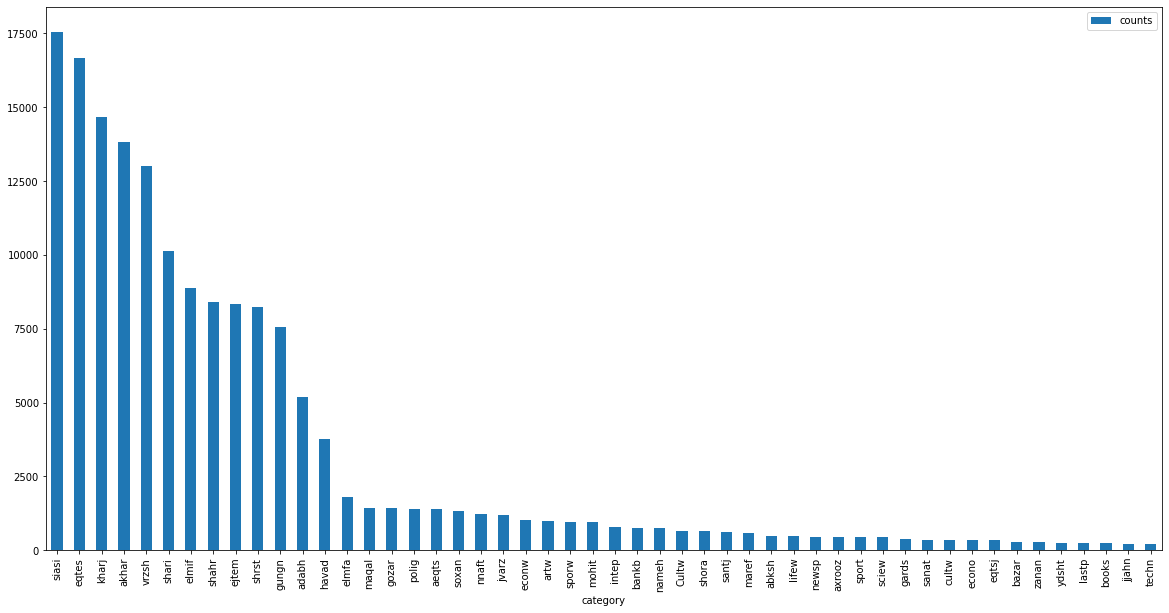

In [157]:
df.groupby(['category']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)[:50].plot(
    x='category', y='counts', kind='bar', figsize=(20, 10)
)